In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

%matplotlib inline
np.random.seed(1337)

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')
x_train /= 255
x_test /= 255

In [29]:
number_of_classes = 10
y_train.shape

(60000,)

In [30]:
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [31]:
y_test.shape

(10000, 10)

In [32]:
#model
model = Sequential()
model.add(Dense(784, input_shape = (784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
classifier = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = True, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.1996 - acc: 0.9418 - val_loss: 0.1084 - val_acc: 0.9688
Epoch 2/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.0835 - acc: 0.9758 - val_loss: 0.0813 - val_acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.0576 - acc: 0.9833 - val_loss: 0.0727 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 47s 778us/step - loss: 0.0431 - acc: 0.9881 - val_loss: 0.0669 - val_acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 49s 822us/step - loss: 0.0334 - acc: 0.9915 - val_loss: 0.0601 - val_acc: 0.9817
Epoch 6/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.0266 - acc: 0.9932 - val_loss: 0.0577 - val_acc: 0.9820
Epoch 7/10
60000/60000 [==============================] - 51s 856us/step - loss: 0.0213 - acc: 0.9952 - val_loss: 0.

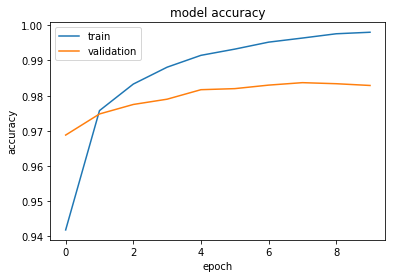

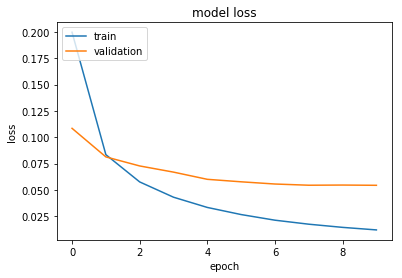

In [34]:
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()